# <span style="color:blue"> Explore Classification algorithms applied on the Iris Flower data set associated with Ronald Fisher</span>
***

## <span style="color:blue">Introduction</span>
***

The aim of this notebook is to explore classification algorithms by applying them on the well known *Iris data set*.
- I will begin by explaining what supervised learning is and explain what classification algortihms are in machine learning.
- Next, I will describe some of the classification algorithms and demonstrate them on the *Iris data set* using the ``scikit-learn`` Python Library. 
- Throughout my notebook, I will be using appropriate plots, mathematical notation and diagrams to explain relevant concepts.

For this notebook, I have used and adapted code provided in lecturers from my lecturer, Ian McLoughlin. I have referenced all other sources throughout the notebook and at the references section at the end. 

## <span style="color:blue">Importing Libraries for this notebook</span>
***

Before carrying out any code, I have first imported the Libraries that will be needed for the successful running of the notebook. These libraries are collections of code that have already been put together so that the programmer does not need to write the same code again. Instead, the required libraries are imported and using the ``as`` keyword, the libraries are stored as shorter aliases. For example, to ``import pandas``, we would use the ``as`` keyword and the alias ``pd``. This is for simplicity and tidiness when using the libraries throughout the notebook.

In [1]:
# Working with Data frames
import pandas as pd

# Creating Plots
import matplotlib.pyplot as plt 

# Creating Statistical Plots
import seaborn as sns 

# Machine Learning 
import sklearn as sk

# Mathematical functions
import numpy as np

# Knn 
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

#Train test split for the Classifiers
from sklearn.model_selection import train_test_split

# Accuracy of the Classifiers
from sklearn.metrics import accuracy_score

# Decomposition (PCA)
import sklearn.decomposition as dec

## <span style="color:blue">What is Supervised Learning?</span>
***

Before getting into the explanation of supervised learning, firstly I will set out to explain the concept of machine learning as supervised learning is part of the machine learning family. 

### <span style="color:blue">Machine Learning</span>
According to [IBM, (n.d.)](https://www.ibm.com/topics/machine-learning)<sup>1</sup>, Machine Learning (ML) is a branch of Artificial Intelligence which uses data and algorithms to imitate the way humans learn. This, with time will improve the accuracy of Artificial Intellegence, computer science and the use of algorithms for this. 

An article titled [*What is machine learning and how does it work? In-depth guide*](https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML#:~:text=In%2Ddepth%20guide,-Share%20this%20item&text=Machine%20learning%20(ML)%20is%20a,improve%20their%20performance%20over%20time.) by Tucci. L, (n.d.)<sup>2</sup>, explains concept of Machine Learning (ML). She explains it as being a type of Artificial Intelligence (AI) which focuses on building computer systems that learn from data. Machine Learning algorithms use data that we already have and use it as an input to train the algortihms to find relationships and patterns in the data. These trained algortihms then predict outputs, classify information, cluster data points, reduce dimensionality and help to generate new content or data.  

Under the Machine Learning umbrella, according to [IBM, (n.d)](https://www.ibm.com/topics/machine-learning)<sup>3</sup>, there are three main methods: *Supervised machine learning*, *Unsupervised machine learning* and *Semi-Supervised machine learning*. However, for this Notebook, I will be focusing on the most common type which is *Supervised machine learning*.

### <span style="color:blue">Supervised Learning</span>
Supervised machine learning (or supervised learning) is a form of machine learning that uses a dataset where we already have data in the form of inputs (X variables) and the corresponding outputs (y variables). The input and output data are known as labeled data [datacamp, (2022)](https://www.datacamp.com/blog/supervised-machine-learning)<sup>4</sup>. 

This labeled input and output data then goes through a stage of *training* during which the prgoram recognises or learns the relationship between the input data and the output data [Shee. Ed, (2022)](https://www.seldon.io/supervised-vs-unsupervised-learning-explained)<sup>5</sup>. Once the program has been trained using the training data, it can then be used to predict the output (y), from given inputs (X) on other data that it has not been trained on. For example in the case of the *Iris data set* once the program has been trained on the data set and someone were to come along with some more iris flowers data, the trained algorithm could be used to predict which of the three types of iris flower (y) (ie: Setosa, Versicolor or Vriginica) it was , given the inputs (X) data (ie: Sepal Length & width and Petal length & width). 

## <span style="color:blue">What are classification algorithms?</span>
***
While there are may different variations of definitions of classifiers in machine learning, according to [Datacamp, (2022)](https://www.datacamp.com/blog/classification-machine-learning)<sup>6</sup> classification is where the model tries to predict the correct output , given a some input data. The model is fully trained on a training set of data and is tested on a test set of data before it is used to make predictions on new  data that it has not seen before. 

According to [Shiksha Online, (2023)](https://www.shiksha.com/online-courses/articles/predicting-categorical-data-using-classification-algorithms/)<sup>7</sup> for using classifiers, the outcome or output predicted by the classification algorithm must be a categorical variable. A categorical variable is a variable that has a limited number of possible values or categories, and can be eithier nominal or ordinal [IBM, (2021)](https://www.ibm.com/docs/en/spss-statistics/27.0.0?topic=charts-variable-types)<sup>8</sup>. In the case of the Iris data set, the output variables are categorical and are nominal values (there is no ranking in terms of their values). 

## <span style="color:blue">The Iris data set</span>
***

The data set contains 150 rows or samples in total, allowing for 50 observations of each of the three Species of Iris Flowers: *Iris setosa, Iris Versicolor and Iris Verginica*. Each of the three sepcies then have four characteristics or atributes: *Sepal length & width and Petal length & width*.

</br>

|Setosa|Virginica|Versicolor|
|:-:|:-:|:-:|
|![Setosa](./images/Iris-Setosa.jpg)|![Virginica](./images/Iris-Virginica.jpg)|![Virsicolor](./images/Iris-Versicolor.jpg)|

Image Sources:
</br>

https://en.wikipedia.org/wiki/Iris_setosa <br/>
https://en.wikipedia.org/wiki/Iris_versicolor <br/>
https://en.wikipedia.org/wiki/Iris_virginica </br>
</br>

This data set was first introduced in [Ronald Fisher's](https://en.wikipedia.org/wiki/Ronald_Fisher)<sup>9</sup> 1936 paper [*The use of multiple measurements in taxonomic problems*](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) <sup>10</sup> and is commonly known as *Fisher's Iris data set* for this reason.
</br>

<figure>
    <img src="./images/Ronald-Fisher.jpeg"
         height="250"
         alt="Ronald Fisher">
    <figcaption>Sir Ronald Fisher</figcaption>
    </br>
    <figcaption>Image source: https://en.wikipedia.org/wiki/Ronald_Fisher</figcaption>
</figure>
</br>

However, it is also sometimes known as *Anderson's Iris data set* as it was [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson)<sup>11</sup> who collected the data for the compilation of the data set [Wikipedia, (2023)](https://en.wikipedia.org/wiki/Iris_flower_data_set)<sup>12</sup>.

</br>

<figure>
    <img src="./images/Edgar-Shannon-Anderson.jpg"
         height="275"
         alt="Edgar Shannon Anderson">
    <figcaption>Edgar Shannon Anderson</figcaption>
    </br>
    <figcaption>Image source: https://thedailygardener.org/otb20190618/ </figcaption>
</figure>



## <span style="color:blue">Reading in the iris.csv data set</span>
***

For this notebook, I have sourced the a version of the Iris data set from [Kaggle. UCI Machine Learning](https://www.kaggle.com/datasets/uciml/iris/)<sup>13</sup>.

Using [Pandas](https://pandas.pydata.org/docs/)<sup>14</sup> which is the first of the libraries imported above, I have read in the Iris.csv file. I have given the path to the *data* folder in which it is saved so that Pandas can locate the .csv file.

Once imported using pandas, the file is now known as a **dataframe**, which is two dimentional in structure. It contains the data and its column labels (*SepalLengthCm*, *SepalWidthCm*, *PetalLengthCm*, *PetalWidthCm* and *Species*) and the row label (*Id*). 

Calling ``df`` then shows the first 5 and the last five rows of data in the dataframe as shown below:

In [2]:
# Read in the .csv dataset from the data folder 
df = pd.read_csv('data/Iris.csv')

# Show the dataframe
print("\t \t \t \t Iris Dataframe")
df

	 	 	 	 Iris Dataframe


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## <span style="color:blue">Review of the Dataframe</span>
***
In the dataframe above, the rows are indexed from 0 through to 149 as shown. The index is not part of the data of the .csv file, it is simply in the dataframe to show the indexes of the rows. As the index starts from 0, this is why there are 150 rows of data but only 149 indexes. 

Similarly, the columns are indexed starting from 0. However, the indexes of the columns are not shown on the dataframe. So in the dataframe above, the *Id* column is index 0, *SepalLengthCm* column is index 1 and so on up to *Species* which is index 5.

The dataframe is made up of four input variables: (*SepalLengthCm*, *SepalLengthCm* *SepalLengthCm* *SepalLengthCm*). All of these variables are of type [float](https://www.w3schools.com/python/gloss_python_float.asp)<sup>15</sup> (or floating point number) which means that they are real numbers which can contain decimal places. 

The dataframe's output variable is *Species* which is of type [string](https://www.geeksforgeeks.org/python-string/)<sup>16</sup> (or str) which is a datatype made up of a sequence of characters.   

Lastly, the *Id* column is of type [integer](https://www.geeksforgeeks.org/python-numbers/)<sup>17</sup> (or int) which means it is a whole number. The *Id* column won't serve a purpose as such for this study and will be removed from the dataframe later on.

### <span style="color:blue">Data types</span>

Using the [Pandas dataframe.dtypes](https://www.w3schools.com/python/pandas/ref_df_dtypes.asp)<sup>18</sup> property below, the datatype of each column of the dataframe can be returned. 

Taking a look at the *Id*, *SepalLengthCm*, *SepalLengthCm*, *SepalLengthCm*, *SepalLengthCm* attributes of the dataframe, these all match up to what I have advised above. However, you will notice that the datatype of the *Species* attribute returns as type *Object*. This is because strings are stored as objects by default in pandas due to the fact that strings can vary in length [Schork. J, (n.d.)](https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python#:~:text=Hence%2C%20strings%20are%20by%20default,consider%20it%20as%20a%20string.)<sup>19</sup>, [Siraj. S (2017)](https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe)<sup>20</sup>. 

In [3]:
# Return the data types of each of the columns in the DataFrame
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### <span style="color:blue">Describe the data</span>

Next, the Pandas [describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.)<sup>21</sup> method, returns a description of the numerical data in the dataframe: the total count of rows of data along with the the mean, standard deviation, minimum values, maximum values and 25th 50th and 75th percentile values of the data. The standard describe() method, however does not return any information about any non-numberical data, so you will notice that details of the output variable *Species* are not retruned.

In [4]:
# Describe the DataFrame's numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In order to return details of the *Species* column, which earlier we established is of datatype *object*, I have sourced code from  [Patanam. I, (2015)](https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns)<sup>22</sup>. Below, using the same ``describe()`` method and inputting ``include =['O']`` as a parameter to the method, it retruns some details of the *Species* column. 

It shows that there are 150 rows of data in total, there are 3 unique value types and the frequency of each of the three unique value types is 50.

In [5]:
# Describe the DataFrames columns which contain objects
df.describe(include = ['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## <span style="color:blue">Cleaning the DataFrame</span>
***

Before carrying out any analysis or implementing any classification algorithms on the dataset, I have first cleaned the dataframe.

### <span style="color:blue">Check for missing values in the DataFrame</span>

Firstly, I have checked the dataset to ensure there are no missing values. 

In the Pandas Library, any missing values in the DataFrame are denoted by ``NaN``. NaN in Pandas stands for *Not A Number* [geeksforgeeks (n.d.)](https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/)<sup>23</sup>. 

Using code from [Data to Fish (2021)](https://datatofish.com/check-nan-pandas-dataframe/)<sup>24</sup>, below I have checked to see if there are any missing values in the dataframe by using the ``df.isnull()`` method followed by ``values.any()`` which searches the dataframe for any missing ``NaN`` or ``Null`` values. The ``.sum()`` method then calculates how many (if any) missing values there are. Below, we can see that the function returns 0, so the DataFrame does not contain any missing values.

In [6]:
# Checking for any missing values 
# Using the .sum() at the end to get the total number of missing values 
anyMissingData = df.isnull().values.any().sum()

# Show
anyMissingData

0

It is essential to remove all missing data from the dataframe **before** splitting the dataframe into **X** (input variables) and **y** (output variable). This is because if the ``Nan`` values are removed after the split is done, the input data will not correspond with the correct output data. The dataframe will be split into **X** and **y** later on in the notebook.

### <span style="color:blue">Remove the *Id* column</span>
Next, I have removed the *Id* column from the DataFrame as it will not be used for the training and testing of the Classification algorithms. To do this, I have sourced code from [freeCodeCamp (2023)](https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/)<sup>25</sup>. Below, we can see that the DataFrame now still has 150 rows of data but now only has 5 columns.

In [7]:
# Drop the Id column from the DataFrame 
df = df.drop(columns=['Id'])

In [8]:
# Show the new DataFrame with Id column removed 
print("\t \t Iris Dataframe With Id Column Removed")
df

	 	 Iris Dataframe With Id Column Removed


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### <span style="color:blue">Check the DataFrame for Outliers</span>

#### <ins> Boxplots</ins>

The next stage in the preperation of the DataFrame is to check if it contains any outliers. Outliers are any data observations that are numerically distant from the rest of the data [McLeod. S, (2023)](https://www.simplypsychology.org/boxplots.html) <sup>26</sup>. Defined by  [Lemonaki. D. (2021)](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/) <sup>27</sup>, *an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with*.

Below, adapting code from [geeksforgeeks, (n.d.)](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/)<sup>28</sup> to generate four box plots and using the [subplot](https://www.w3schools.com/python/matplotlib_subplot.asp)<sup>29</sup> function, I have derived four boxplots to illustrate the four attributes *PetalLengthCm*, *PetalWidthCm*, *SepalLengthCm & *SepalWidthCm*.

From the plots below we can see that the *SepalWidthCm* attribute contains outliers. The outliers are represented by the the circles at about points 2.0, 4.1, 4.2 and 4.4 on the plot. 

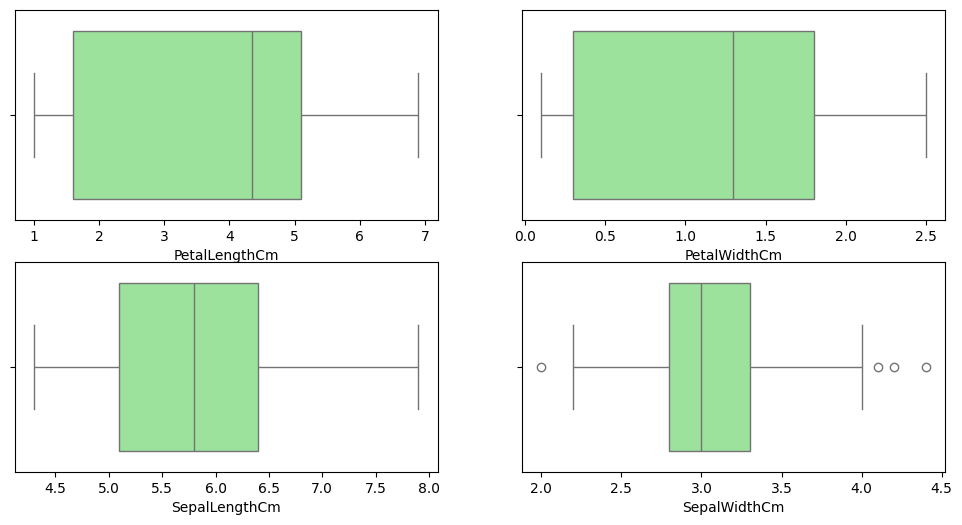

In [9]:
# Plot the boxplots
# Give the plots a size
plt.figure(figsize=(12,6))

# subplot 1 of the 2row*2column plot
plt.subplot(2,2,1)
sns.boxplot(x='PetalLengthCm', data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,2)
sns.boxplot(x='PetalWidthCm',data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,3)
sns.boxplot(x='SepalLengthCm', data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,4)
sns.boxplot(x='SepalWidthCm', data=df, color ="lightgreen")


# Show the plot 
plt.show()

#### <ins>The Interquartile Range</ins>

The DataFrame can also be tested for outliers using the *Interquartile Range (IQR)*. The interquartile range is calculated by getting the difference between the $Q1$ which is the $25^{th}$ percentile and $Q3$ wtich is the $75^{th}$ percentile [Wikipedia, (n.d.)](https://en.wikipedia.org/wiki/Interquartile_range)<sup>30</sup>.

$$IQR = Q3 – Q1$$

Once the interquartile range (IQR) is calculated, next the Lower and Upper Limits are calculated. These limits are calculated as follows:

$$Lower Limit = Q1 - (1.5*IQR)$$
$$Upper Limit = Q3 + (1.5*IQR)$$

Any datapoints that lie either below the lower limit or above the upper limit are considered to be outliers in the data [Zach, (2021)](https://www.statology.org/upper-and-lower-fences/)<sup>31</sup>. 

Below, I have sourced code from [Kleppen. E, (2023)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).)<sup>32</sup> which first defines a function called ``find_outliers_IQR`` and then uses the defined function to establish if any of the four attributes contain any outliers. Using the defined function, each numerical attribute is passed in to the function and and the print function then prints the number of outliers (if any) and the value of the maximum and minimum outlier.

In [10]:
# Define the Function 

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   lower = q1 - 1.5*IQR
   upper = q3 + 1.5*IQR
   outliers = df[((df<(lower)) | (df>(upper)))]
   
   #Return the defined function 
   return outliers

outliers = find_outliers_IQR(df["PetalLengthCm"])
print("*PetalLengthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["PetalWidthCm"])
print("*PetalWidthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["SepalLengthCm"])
print("*SepalLengthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["SepalWidthCm"])
print("*SepalWidthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

*PetalLengthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*PetalWidthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*SepalLengthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*SepalWidthCm*
number of outliers: 4
max outlier value: 4.4
min outlier value: 2.0


Above, we can see that only the *SepalWidthCm* attribute contains outliers, with the same outlier values as the values I had already estimated from the box plot above. As there are only four outliers in the data and the dataset is relatively small to being with, I have chosen not to remove the outliers from the data.

## <span style="color:blue">Visualising the variables using histograms</span>
***

Below, using the [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) <sup>33</sup>  and [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) <sup>34</sup>, I have created histograms to visualise all of the variables from the DataFrame. I have used the [Matplotlib Subplot](https://www.w3schools.com/python/matplotlib_subplot.asp) <sup>35</sup> function to plot these side by side. These plots give a visual representation of the occurances of each of the values of the four independent variables and the one dependent variable.

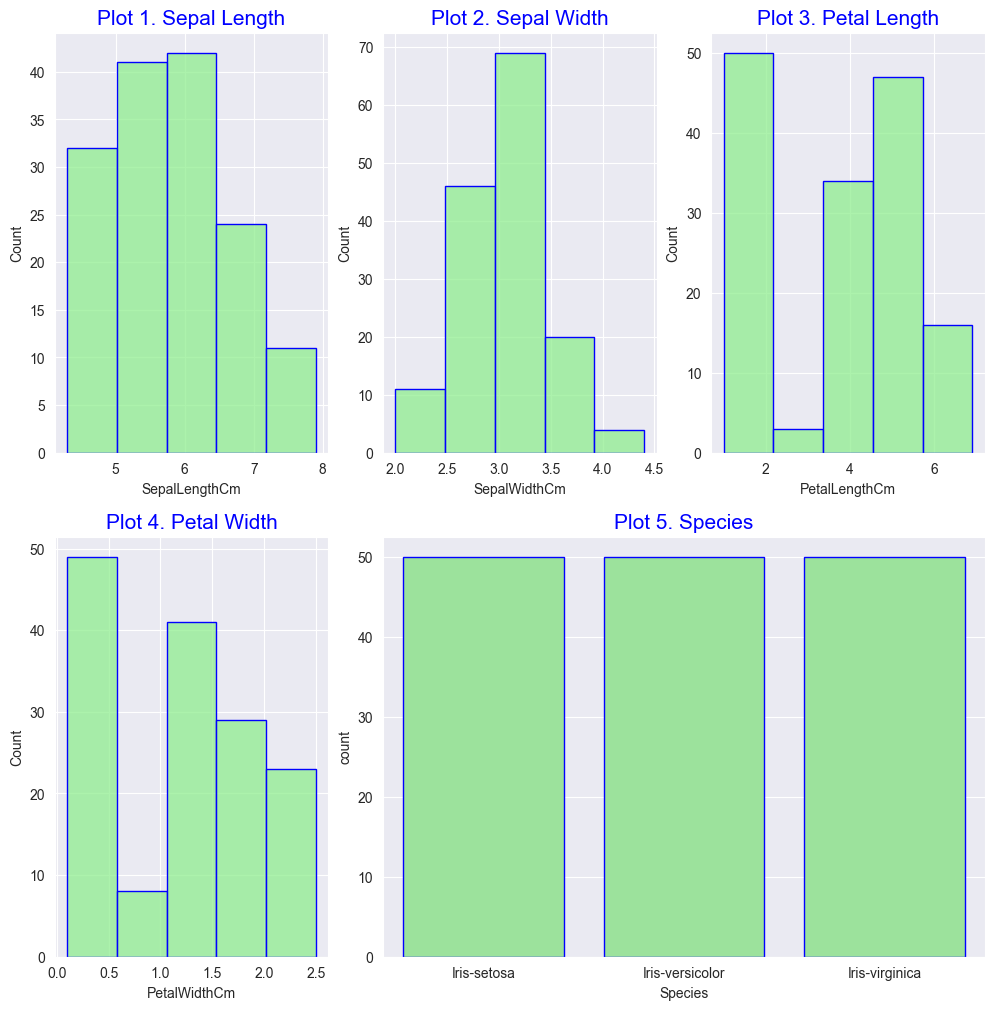

In [11]:
# Create empty subplots
plt.figure(figsize=(12,12))
sns.set_style("darkgrid")


# Add data to the subplots
plt.subplot(2,3,1)
plt.title( "Plot 1. Sepal Length" , size = 15, color ="blue") 
sns.histplot(data=df, x ="SepalLengthCm", bins =5, color = "lightgreen", edgecolor ="blue")

plt.subplot(2,3,2)
plt.title( "Plot 2. Sepal Width" , size = 15, color ="blue") 
sns.histplot(data=df, x ="SepalWidthCm", bins =5, color = "lightgreen", edgecolor ="blue")

plt.subplot(2,3,3)
plt.title( "Plot 3. Petal Length" , size = 15, color ="blue") 
sns.histplot(data=df, x ="PetalLengthCm", bins =5, color = "lightgreen", edgecolor ="blue")

plt.subplot(2,3,4)
plt.title( "Plot 4. Petal Width" , size = 15, color ="blue") 
sns.histplot(data=df, x ="PetalWidthCm",  bins =5, color = "lightgreen", edgecolor ="blue")

plt.subplot(2,3,(5,6))
plt.title( "Plot 5. Species" , size = 15, color ="blue") 
sns.countplot(data=df, x ="Species", color = "lightgreen", edgecolor ="blue")

# Show the subplots
plt.show()

Plots 1 to 4 above tell us the following about the dataset:
- The most frequent occurance of the *Sepal Length* is around 42 where the length is between 5.8cm and 6.5cm 
- The most frequent occurance of the *Sepal Width* is about 69 where the width is between 3.0cm and 3.5cm
- The most frequent occurance of the *Petal Length* is about 50 where the length is between 0.4cm and 2.1cm 
- The most frequent occurance of the *Petal Width* is about 49 where the width is between 0.1cm and 0.5cm 

Plot 5 tells us that there are 50 occurances of each of the three types of species in the dataset.

## <span style="color:blue">Visualising the variables using histograms with the **hue** parameter </span>
***

I have delved into the analysis of the variables further by using the ``hue`` parameter and inputting the dependent variable *Species* as the hue. This produces the following four plots:

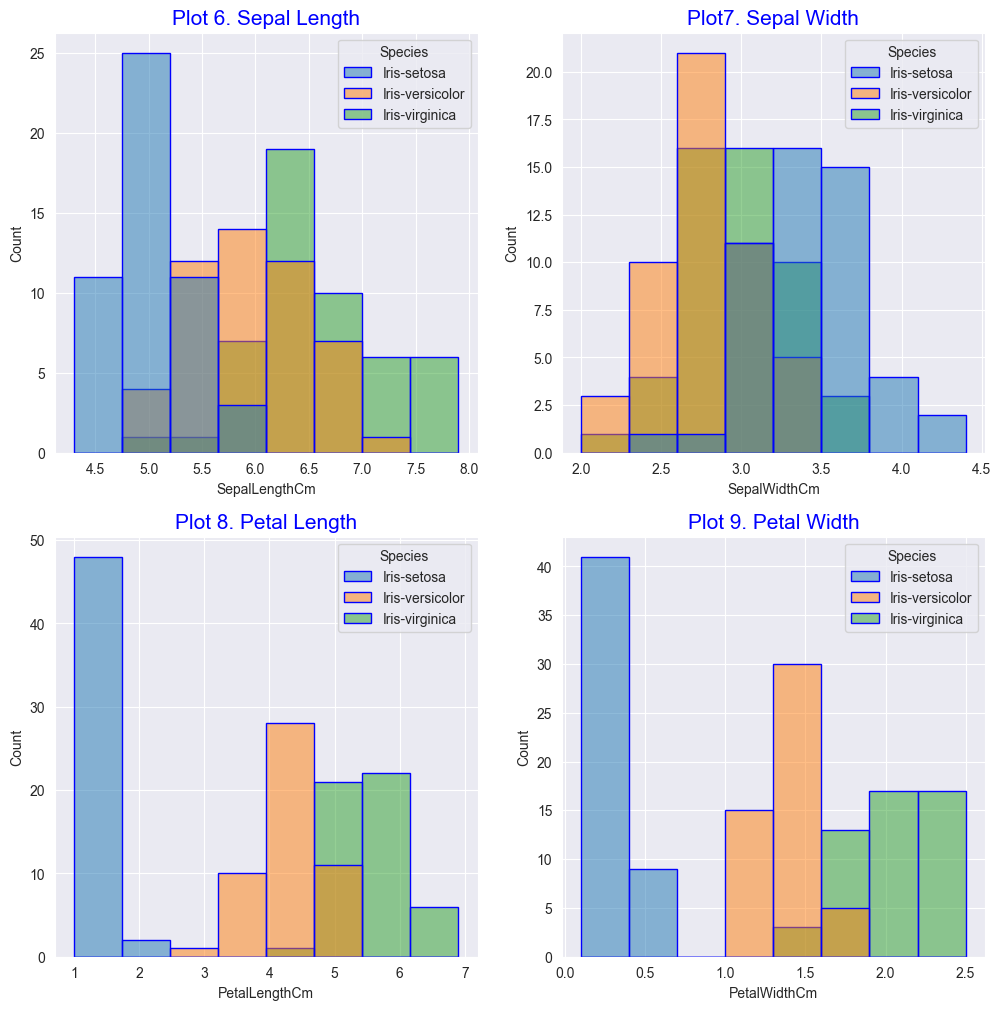

In [12]:
# Create empty subplots
plt.figure(figsize=(12,12))
sns.set_style("darkgrid")


# Add data to the subplots
plt.subplot(2,2,1)
plt.title( "Plot 6. Sepal Length" , size = 15, color ="blue") 
sns.histplot(data=df, x ="SepalLengthCm", bins =8, color = "lightgreen", edgecolor ="blue", hue ="Species")

plt.subplot(2,2,2)
plt.title( "Plot7. Sepal Width" , size = 15, color ="blue") 
sns.histplot(data=df, x ="SepalWidthCm", bins =8, color = "lightgreen", edgecolor ="blue", hue ="Species")

plt.subplot(2,2,3)
plt.title( "Plot 8. Petal Length" , size = 15, color ="blue") 
sns.histplot(data=df, x ="PetalLengthCm", bins =8, color = "lightgreen", edgecolor ="blue", hue ="Species")

plt.subplot(2,2,4)
plt.title( "Plot 9. Petal Width" , size = 15, color ="blue") 
sns.histplot(data=df, x ="PetalWidthCm",  bins =8, color = "lightgreen", edgecolor ="blue", hue ="Species")


# Show the subplots
plt.show()

Above, it is clear that the Iris-Setosa species has significantly different values for *Petal Length* and *Petal Width*. However, with the *Sepal Length* and *Sepal Width* there is more of an overlap in values amongst the three Species of flower. 
</br>

It is also interesting no note here that in terms of the *Sepal Length* and *Sepal Width* plots, the *Iris-Setosa's* most common *Sepal Length* is between 4.75cm and 5.2cm and it's *Sepal Width* is between 3.25cm and 3.5cm. However, for the *Iris-Virginica* the most common *Sepal Length* is much larger, between 6.2cm and 6.5cm and it's most common *Sepal Width* is between just 2.9cm and 3.25cm.

## <span style="color:blue">Pairplots</span>

Below, using the [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)<sup>36</sup> which gives another visual summary of the numerical independent data. I have used the [iloc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)<sup>37</sup> indexer to pull out all of the rows and the columns from index 0 through to index 5. As the iloc[] indexer does not include the last index inputted into it, I have inputted 5, so that index 4 is included.

The pairplot takes each attribute and plots it against each of the other attributes. Each dot on the plot represents a row (instance) in the dataframe. So for each instance, each attribute is plotted against all of the other attributes. Using the ``hue`` on the Species attribute adds colour to the pairplot based on the three types of Species which makes the data clearer. 

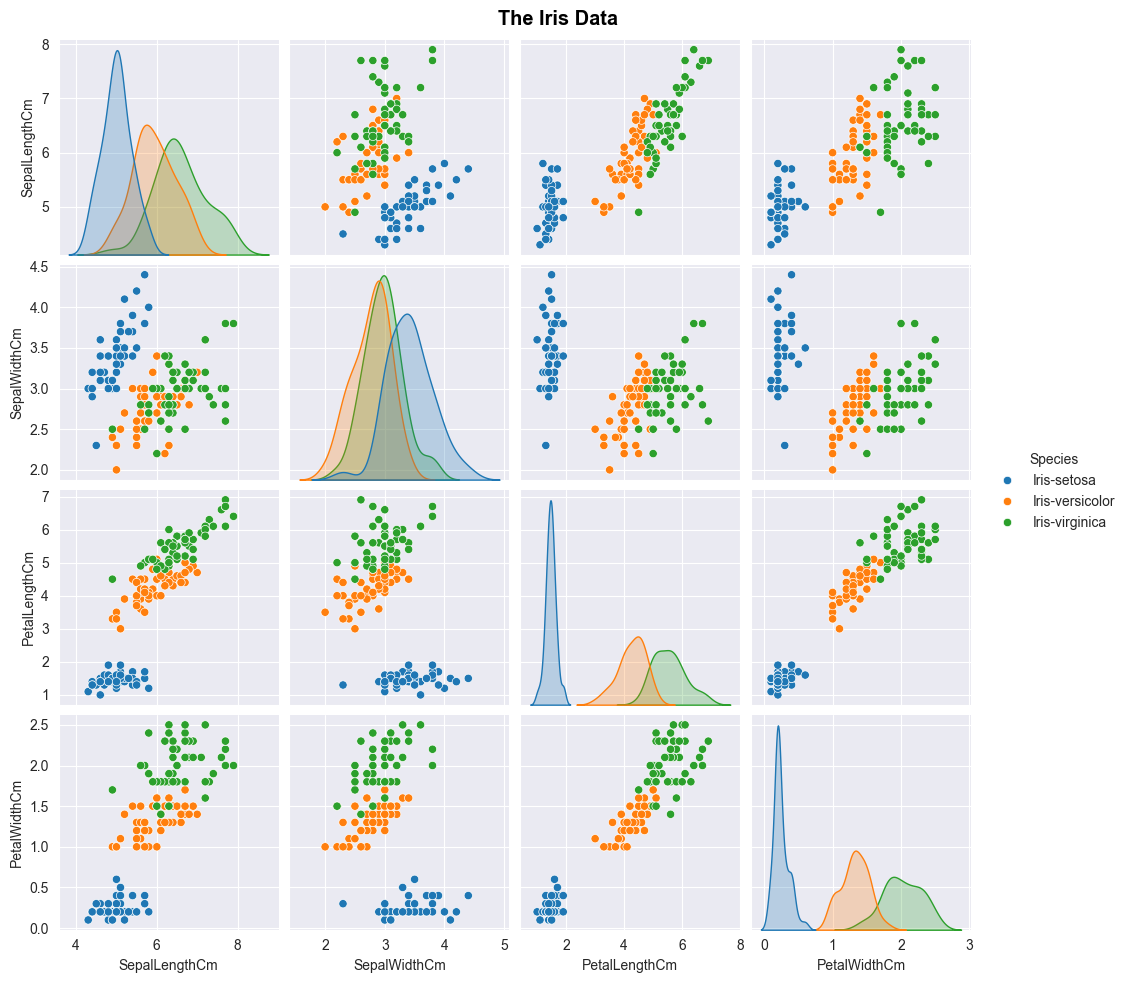

In [13]:
pp = sns.pairplot(df.iloc[:,0:5], hue="Species", height = 2.5)
#Create a heading for the pair plot
pp.fig.suptitle("The Iris Data" , 
               fontsize = 'x-large' ,  
               fontweight = 'bold',
                color = "black" ) 
  
# Adjust subplots so that title doesn't lie on top of the top plots
pp.fig.subplots_adjust( top = 0.95 ) 
plt.plot()
plt.show()

On the plots above, *Iris-Setosa*, *Iris-Versicolor* and *Iris-Virginica* are represented by the blue, orange and green dots respectively. From these plots, it is evident that the *Iris-Setosa* class is easily seperable from the other two classes as the blue dots do not overlap with the orange or green dots. However, regarding the the *Iris-Virginica* and the *Iris-Versicolor*, there is a lot of overlap in the dots so these are not as easily seperable. 

With this in mind, next I will next describe and implement some classification algorithms using the *Iris Dataset* and test the accuracy of each of them.

## <span style="color:blue">Data Preprocessing</span>
***

While I have already carried out some work on the dataframe in terms of cleaning it and preparing it above, there are some further steps that should be taken before implementing the Classifiers on it. 

### <span style ="color:blue">Split the dataframe by input and output variables</span>
Firstly, below, I have split the data into the independent variables **X** and the dependent variable **y**. As I mentioned above, it is essential that any missing values in the dataframe are removed before carrying out this step as if missing values are removed after splitting the dataframe, the **X** values will not correspond to their correct **y** values.

In [14]:
# Independent variables.
X = df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]

# Show.
X

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [15]:
# Dependent variable.
y = df['Species']

# Show.
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### <span style="color:blue">Calculate Euclidean distance</span>

Next, below I have calculated the Euclidean Distance betweenn the **X** values in the dataframe using the first and last rows of data. The Eucidean Distance is the shortest distance between two points of data [Banerjee.W, (2020)](https://medium.com/analytics-vidhya/role-of-distance-metrics-in-machine-learning-e43391a6bf2e)<sup>37</sup>. I have used the [iloc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)<sup>38</sup> indexer to pull out the first and last rows of data from the new X dataframe which contains only the independent X values. I have chosen the first and last rows as they are likely to differ as they contain data of two different Species of Iris.

In [16]:
# First row of the dataframe
X.iloc[0]

PetalLengthCm    1.4
PetalWidthCm     0.2
SepalLengthCm    5.1
SepalWidthCm     3.5
Name: 0, dtype: float64

In [17]:
# Last row of the dataframe
X.iloc[149]

PetalLengthCm    5.1
PetalWidthCm     1.8
SepalLengthCm    5.9
SepalWidthCm     3.0
Name: 149, dtype: float64

Once the distance between the two rows of data has been established, the [Euclidean distance](https://towardsdatascience.com/optimising-pairwise-euclidean-distance-calculations-using-python-fc020112c984)<sup>39</sup> can be calculated. The Euclidean distance formula is as follows:

$$d(x,y) = \sqrt{{\sum\limits_{i=1}^n}{(y_i - x_i)^2}}$$

Where:
- $y$ and $x$ are the two points we are looking to get the difference between




In [18]:
# Euclidean distance - first step.
# Subtract the two rows of data from eachother 
X.loc[0] - X.loc[149]

PetalLengthCm   -3.7
PetalWidthCm    -1.6
SepalLengthCm   -0.8
SepalWidthCm     0.5
dtype: float64

In [19]:
# Euclidean distance - second step.
# Square the results we got in step 1
(X.loc[0] - X.loc[149])**2

PetalLengthCm    13.69
PetalWidthCm      2.56
SepalLengthCm     0.64
SepalWidthCm      0.25
dtype: float64

In [20]:
# Euclidean distance - third step.
# Sum the squared results 
((X.loc[0] - X.loc[149])**2).sum()

17.14

In [21]:
# Euclidean distance - final step.
# Get the square root 
round((((X.loc[0] - X.loc[149])**2).sum())**0.5,5)

4.14005

### <span style="color:blue">Scaling</span>
Feature scaling often needs to be carried out on data before implementing the Euclidean Distance because real-world datasets often contain data or features that vary in terms of magnitude, range and units [Chong. J, (2020)](https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048#:~:text=Feature%20scaling%20is%20the%20process,need%20to%20perform%20feature%20scaling.)<sup>40</sup>

If the data has values of significant scale differences, the data with very high values will dominate the distance measure. This would become a problem as at the *squaring* stage of the calculation of the Euclidean Distance, if the figure to be squared is much larger than the others, once it is squared, it is going to have a heavy weighting on the distance metric which in turn will throw the accuracy of the Classification Algorithm. This is why data sometimes needs to be normalised or standardised before calculating the Euclidean Distance [Banerjee. W, (2020)](https://medium.com/analytics-vidhya/role-of-distance-metrics-in-machine-learning-e43391a6bf2e)<sup>41</sup> 


The result of the Euclidean Distance above of 4.14005 suggests that there is no need for any form of scaling on this dataset before implementing Classifiers as all of the values appear to be of similar magnitude and all of the data are of the same unit type (Cm).

## <span style="color:blue">Classifiers</span>
***

This section focuses on describing some of the machine learning algorithmsn and their implementation. The classifiers I am going to look at are:

1. K Nearest Neighbors (Knn)

2. Gaussian Naive Bayes

3. Random Forest

### <ins><span style="color:blue">1. K Nearest Neighbors (Knn)</span></ins>

Knn is a supervised learning classifier that uses proximity to make classifications or predictions as to what class to group a particular data point [IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.)<sup>42</sup>. This means that it relies heavily distance between the data points as it makes it's decision or 'vote' on which class to put a new datapoint into based on what class similar datapoints around it are from.

For this classifier, I have sourced code from [Aggarwal.S, (2020)](https://towardsdatascience.com/k-nearest-neighbors-94395f445221)<sup>43</sup>.


#### <span style="color:blue">Split the data</span>
Firstly I have used [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<sup>44</sup> for splitting the data into training and testing data. This function splits the data from the dataframe randomly so that there is data being used from throughout the dataset for training to make the training fairer. Test size = 0.33 means that two thirds of the input data **X** and output data **y** will be used to train the classifier and the remaining one third of the input and output data will be used for testing.

In [22]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

#### <span style="color:blue">Create a new instance of the Classifier</span>
Next, I have created a new instance of the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) <sup>45</sup> and I have left the number of neighbors set at the default of 5 neighbors.

In [23]:
# Creating an instance of the Classifier 
knn = KNeighborsClassifier(n_neighbors=5)

#### <span style="color:blue">Train the Classifier</span>

Below, I have used the [fit()](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)<sup>46</sup> method to train the classifier using the input and output training data which I generated above.

In [24]:
# Train the Classifier 
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### <span style="color:blue">Predict the outputs</span>

A prediction of results or output data is then made using the remaining one third test data. Below, is the 50 predicted output values, given the 100 input test values.

In [25]:
# Classifiers Predicted outputs
pred = knn.predict(X_test)

#Show
pred 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

Below, I have compared the predicted outputs with the correct outputs to establish how many times the predicted output values were correct. I used the ``sum()`` function to add them together to make the result easier to visualise. 

In [26]:
(knn.predict(X_test) == y_test).sum()

48

#### <span style="color:blue">Accuracy of the results using train test split</span>

The result below shows how accurate the Classifier was at predicting the output values as a result of using the train test split method. The figure below will change each time the Classifier is run as the data being used to train differs each time. This method 

In [27]:
# Show the accuracy of the Classifier 

accuracy = print('Accuracy:', accuracy_score(pred,y_test))

accuracy

Accuracy: 0.96


#### <span style="color:blue">Cross Validation Scores</span>

The accuracy of the Classifier can also be established using [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html) <sup>47</sup>. Here, using the ``cv =5``, the dataset is divided into 5 chunks of random data, where 4 of the chunks are training data and the fifth chunk is testing data. This means the Cross Validation carries out 5 tests, using a different chunk of data as the test data each time. It produces 5 accuracy scores as shown below.

In [28]:
# Create new Instance of the Classifier 
knn = sk.neighbors.KNeighborsClassifier()

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(knn, X, y, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

Below, using the [numpy.average](https://numpy.org/doc/stable/reference/generated/numpy.average.html)<sup>47</sup> function, I have calculated the average of the five results from the Cross Validation to get a single figure showing the accuracy.

In [29]:
# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(knn, X, y, cv=5))

# Show
print("Average Score:",round(avg,2))

Average Score: 0.97


### <ins><span style="color:blue">2. Gaussian Naive Bayes</span></ins>
Naive Bayes methods are also a set of supervised learning algorithms and are based on Applying Bayes' Theorem [scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html)<sup>48</sup>. Bayes Theorem describes the probability of an outcome based on prior knowledge of conditions that might be related to the outcome [Wikipedia](https://en.wikipedia.org/wiki/Bayes%27_theorem)<sup>49</sup>. It uses the the assumption of [Conditional Independence](https://en.wikipedia.org/wiki/Conditional_independence)<sup>50</sup>.

According to [datacamp.(2023)](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)<sup>51</sup>, Naive Bayes is the most straighforward classification algorithm and is suitable for large datasets. These classifiers have high accuracy rates on larger datasets.

#### <span style="color:blue">Split the data</span>
Again, the Gaussian Niave Bayes Classifier starts off the same way as the previous Classifier by splitting the data into training and testing data. This is done for both the **X** and **y** below. Again, below I have divided the data into three thirds, where two thirds of the data is for training the classifier and the remaining third is for testing the classifier.

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

#### <span style="color:blue">Create a new instance of the Classifier</span>
Next, I have created a new instance of the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) <sup>52</sup> Classifier. This classifier does not take in any parameters. 

In [31]:
# Create instance of the Naive Bayes Classifier 
gnb = GaussianNB()

#### <span style="color:blue">Train the Classifier</span>

Again, similar to the Knn Classifier, the next step is to fit the data/ train the classifier.

In [32]:
gnb.fit(X_train, y_train)

GaussianNB()

#### <span style="color:blue">Predict the outputs</span>

A prediction of results or output data is then made using the remaining one third test data. Below, is the 50 predicted output values, given the 100 input test values.

In [33]:
pred = gnb.predict(X_test)

pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'],
      dtype='<U15')

Again, below, I have compared the predicted outputs with the correct outputs to establish how many times the predicted output values were correct. I used the ``sum()`` function to add them together to make the result easier to visualise.

In [34]:
(gnb.predict(X_test) == y_test).sum()

48

#### <span style="color:blue">Accuracy of the results using train test split</span>

The result below shows how accurate the Classifier was at predicting the output values as a result of using the train test split method. Again, the accuracy will vary each time the Classifier is run as the data being used to train differs each time. 

In [35]:
print("Accuracy:",accuracy_score(y_test, pred))

Accuracy: 0.96


#### <span style="color:blue">Cross Validation Scores</span>

Again, using [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html) <sup>46</sup>. Here, again I have used ``cv =5`` so the dataset is divided into 5 chunks of random data, where 4 of the chunks are training data and the fifth chunk is testing data. This means the Cross Validation carries out 5 tests, using a different chunk of data as the test data each time. It has produced 5 accuracy scores as shown below.

In [36]:
# Create new Instance of the Classifier 
gnb = GaussianNB()

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(gnb, X, y, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Again, I used the numpy.average function to get the average of the 5 Cross Validation results.

In [37]:
# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(gnb, X, y, cv=5))

# Show
print("Average Score:",round(avg,2))

Average Score: 0.95


### <ins><span style="color:blue">3. Random Forest</span></ins>

The third classifier I have chosen is Random Forest Classifier.This classifier uses the opinoins of a number of different models (or trees) to make the prediction of the output based on the trained input data. [Sruthi. E.R, (2024)](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=A%20Random%20Forest%20is%20like,robust%20and%20accurate%20overall%20model.)<sup>53</sup>.

I have sourced code from [simplilearn, (2023)](https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm)<sup>54</sup> to demonstrate this classifier.

#### <span style="color:blue">Split the data</span>

Like the last two classifiers, firstly the X and y data are split into training and testing data. Again, I have split is so that three thirs of the data is for training and one third is for testing the classifiers accuracy.

In [38]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

#### <span style="color:blue">Create a new instance of the Classifier</span>
Next, I have created a new instance of the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) <sup>55</sup> Classifier. This classifier takes a number of parameters. I have set the number of n_estimators high at 500. According to [Srivastava. T. (2023)](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/)<sup>56</sup>, the greater this parameter is set at, the more accurate the predictions. 

In [39]:
clf=RandomForestClassifier(n_estimators= 1000)

#### <span style="color:blue">Train the classifier</span>
Like in the two previous classifiers examples, the next step is to train the classifier using the fit() method. 

In [40]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

#### <span style="color:blue">Predict the Outputs</span>

Like before, below, the input test data is then used to predict the values of the output.

In [41]:
pred = clf.predict(X_test)
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

Below, I have compared the predicted output values with the correct output values. This shows that of the 50 samples, 48 of them were predicted correctly.

In [42]:
(clf.predict(X_test) == y_test).sum()

48

#### <span style="color:blue">Accuracy of the results using train test split</span>

Again, the result below shows how accurate the Classifier was at predicting the output values as a result of using the train test split method. Again, the accuracy will vary each time the Classifier is run as the data being used to train differs each time. 

In [43]:
print("Accuracy:",accuracy_score(y_test, pred))

Accuracy: 0.96


#### <span style="color:blue">Cross Validation Scores</span>

Again, using [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html) <sup>46</sup>. Like before, I have used ``cv =5`` so the dataset is divided into 5 chunks of random data, where 4 of the chunks are training data and the fifth chunk is testing data. This means the Cross Validation carries out 5 tests, using a different chunk of data as the test data each time. It has produced 5 accuracy scores as shown below.

In [44]:
# Create new Instance of the Classifier 
clf=RandomForestClassifier(n_estimators= 500, min_samples_leaf=1, bootstrap = True)

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(clf, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Lastly, using the ``np.average`` function, below I have calculated the average of the 5 results from the Corss Validation. 

In [45]:
# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(clf, X, y, cv=5))

# Show
print("Average Score:",round(avg,2))

Average Score: 0.97


## <span style="color:blue">Incorporation of Principal Component Analysis (PCA)</span>
***

Principal component analysis (PCA) is a tool used for analysing larger datasets which have a large number of features/attributes per observation. It is a statistical tool used to reduce the dimentionality of the dataset which helps the interpretability of the data, while maintaining the maximum amount of information that the features hold [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)<sup>57</sup>. The idea is that features of the dataset are combined while incorporating elements of each of the features and create a new compination in a 2D form (ie using just two variables). Some information will be lost in this process, but the idea of PCA is to retain as much information as possible in the process.

Below, I have used PCA on the three classifiers tested above. As the *Iris Dataset* is a relatively small dataset, containing just 4 numerical independent features and 150 rows of data, I would not expect PCA to have a significant impact on the Classifiers tested above. This, along with the fact that the Classifiers already seem to be fairing very well in terms of accuracy before the incorporation of PCA. 

### <span style="color:blue">Create a new instance of PCA</span>

At the beginning of this notebook, I have imported the [sklearn.decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)<sup>58</sup> library which contains the ``PCA`` class and stored it as ``dec``. 

Below, I have used this library to create a new PCA instance and stored the instance as ``pca``. I have inputted the parameter ``n_components =2`` into the instance as my goal is to create a 2D array with just two variables.

In [46]:
pca = dec.PCA(n_components=2)

### <span style="color:blue>Fit the model</span>
The next step is to fit the model and pass in **X** as **X** contains all of the numerical independent data that I am working with.

In [47]:
# Fit the data to pca
pca.fit(X)

PCA(n_components=2)

### <span style="color:blue">Transform **X**</span>
Next, I have transformed **X**. This transformed **X** now contains just two components in a 2D array.

In [48]:
# Transform X

X_pca = pca.transform(X)

# Show X_pca
# X_pca

### <span style="color:blue">Create a new dataframe with pca components</span>

Next, I have created a new dataframe called ``df_pca`` which contains the original **y** variable, Species and the two pca components.

In [49]:
# Create a pca dataframe using the Original Species column and the 2 new pca components

df_pca = pd.DataFrame(df[["Species"]])
 
# All the rows and column index 0 from X_pca
df_pca['pca0'] = X_pca[:,0]

# All the rows and column index 1 from X_pca
df_pca['pca1'] = X_pca[:,1]
# Show 
df_pca

,Species,pca0,pca1
0,Iris-setosa,-2.684207,0.326607
1,Iris-setosa,-2.715391,-0.169557
2,Iris-setosa,-2.889820,-0.137346
3,Iris-setosa,-2.746437,-0.311124
4,Iris-setosa,-2.728593,0.333925
...,...,...,...
145,Iris-virginica,1.944017,0.187415
146,Iris-virginica,1.525664,-0.375021
147,Iris-virginica,1.764046,0.078519
148,Iris-virginica,1.901629,0.115877


### <span style="color:blue">Pariplots</span>

It is clear from the pariplot below demonstrating the two pca components using Species as the hue, that again it is clear that the *Iris-Setosa* is still seperable from the other two classes but that there is still a significant overlap in the datapoints for the *Iris-Virginica* and the *Iris-Versicolor*.

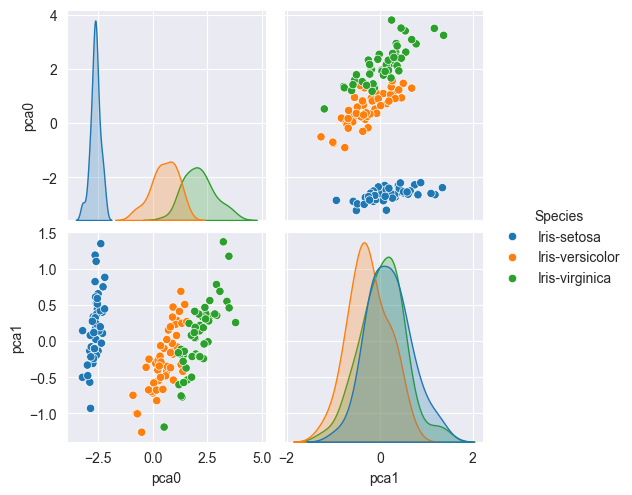

In [50]:
# Pairplot
sns.pairplot(df_pca, hue = "Species")

### <span style="color:blue">Testing the Classifiers with PCA incorporated</span>

Here, I have replaced all of the **X** values from the original dataframe with **X_pca** which are the new two pca components representing X and carried out the three Classifiers again. Below, I have only provided the Cross Validation Scores, I have not included the train test split scores.

In [51]:
# Create new Instance of the Classifier 
knn = sk.neighbors.KNeighborsClassifier()

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(knn, X_pca, y, cv=5)

# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(knn, X_pca, y, cv=5))

# Show
print ("Average score:", round(avg,2))

Average score: 0.97


In [61]:
# Create new Instance of the Classifier 
gnb = GaussianNB()

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(gnb, X_pca, y, cv=5)

# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(gnb, X_pca, y, cv=5))

# Show
print ("Average score:", round(avg,2))

Average score: 0.9


In [53]:
# Create new Instance of the Classifier 
clf=RandomForestClassifier(n_estimators= 500, min_samples_leaf=1, bootstrap = True)

# Run Cross-Validation with five folds
sk.model_selection.cross_val_score(clf, X_pca, y, cv=5)

# Get the average of the 5 Cross Validation Scores.
avg = np.average(sk.model_selection.cross_val_score(clf, X_pca, y, cv=5))

# Show
print ("Average score:", round(avg,2))

Average score: 0.94


## <span style="color:blue">Conclusion of the results</span>
***
At the time of developing this notebook below is a breakdown of the accuracy results for the three classifiers i used:

<ins>**Knn:**</ins>

The Knn Classifier came in the most accurate with an accuracy of 0.98 on the train test split and an average accuracy of 0.97 on the Cross Validation. 

<ins>**Gaussian Naive Bayes:**</ins>

The Gausian Naive Bayes Classifier had an accuracy of 0.98 on the train test split and accuracy of 0.95 on the Cross Vailidation.


<ins>**Random Forest:**</ins>

Lastly, the Random Forest Classifier had an accuracy of 0.96 on the train test split and accuracy of 0.96 on the Cross Vailidation.

</br>


The most surprising of these results is that of the Knn classifier. As this classifier relies so much on distance and the basis of the classifier is to predict the output of a new sample of data based on the datapoints' nearest neighbors (closest datapoints to it), I found it quite surpirsing that this classifier was so accurate as there is quite an overlap in datapoints between the *Iris-Virginica* and the *Iris-Versicolor*.

Having incorporated PCA the results altered slightly: 
- The Knn Cross Validation average score was 0.97.
- The Gausian Naive Bayes Cross Validation average score was 0.90.
- The Random Forest Cross Validation average score was 0.93.

The results of the incorporation of PCA is interesting here as it has not impacted the accuracy of the Knn Cross Validation average score, as it remains at 0.97. However, it has reduced the accuracy of Gausian Naive Bayes and Random Forest Classifiers, reducing the cross validation average scores from 0.95 to 0.90 and from 0.96 to 0.93 respectively. This is likely because there is a large amount of variance in one of the PCA components versus the other.This can be established using the ``Explained Variance Ratio``

### <span style="color:blue">Explained Variance Ratio</span>

Below, I have carried out the ``pca.explained_variance_ratio_`` attribute from the ``sklearn.decomposition.PCA`` class on the two pca components. 

In [58]:
explained_variance = pca.explained_variance_ratio_

print("Explained Variance:", explained_variance)

Explained Variance: [0.92461621 0.05301557]


The result of the Explained Variance Ratio above tells us that the two components are doing a very good job in terms of explaining the overall variance and explanibility of the the four independent features as they are explaining about 97.76% of the variance. However, it is important to note that about 92.46% of the variance is explained by the first pca component and just 0.05% is being explained by the second pca component. 

PCA is very susceptible to a large amount of variation in one variable versus the other so it would be more effective if there was more of a balance between the two components. To achieve this, the data can be scaled. However, as discussed above, scaling the data on the *Iris Dataset* would not be effective either as all of the data is of the same scale and are all of the same unit type.

## <span style="color:blue">References</span>
***

1. IBM, (n.d), What is machine learning </br>
https://www.ibm.com/topics/machine-learning

2. Tucci. Linda (n.d.), What is machine learning and how does it work? In-depth guide </br>
https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML#:~:text=In%2Ddepth%20guide,-Share%20this%20item&text=Machine%20learning%20(ML)%20is%20a,improve%20their%20performance%20over%20time.

3. IBM, (n.d), What is machine learning </br>
https://www.ibm.com/topics/machine-learning

4. datacamp, (Aug 2022). Supervised Machine Learning </br>
https://www.datacamp.com/blog/supervised-machine-learning

5. Shee. Ed, (Spetember 16, 2022). Supervised vs Unsupervised Learning Explained </br>
https://www.seldon.io/supervised-vs-unsupervised-learning-explained

6. datacamp, (September, 2022) Classification in Machine Learning: An Introduction </br>
https://www.datacamp.com/blog/classification-machine-learning

7. Shiksha Online, (January 27, 2023). Predicting Categorical Data Using Classification Algorithms </br>
https://www.shiksha.com/online-courses/articles/predicting-categorical-data-using-classification-algorithms/

8. IBM, (February 02, 2021). Variable Types. </br>
https://www.ibm.com/docs/en/spss-statistics/27.0.0?topic=charts-variable-types

9. Wikipedia, (2023). Ronald Fisher. </br> https://en.wikipedia.org/wiki/Ronald_Fisher

10. Wiley Online Library, (2023). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS </br> https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x

11. Wikipedia, (2023). Edgar Anderson. </br> https://en.wikipedia.org/wiki/Edgar_Anderson

12. Wikipedia, (2023). *Iris* flower data set. </br> https://en.wikipedia.org/wiki/Iris_flower_data_set

13. kaggle. UCI Machine Learning. Iris Species </br>
https://www.kaggle.com/datasets/uciml/iris/

14. pandas, (November 10, 2023). pandas documentation </br>
https://pandas.pydata.org/docs/

15. geeksforgeeks, (n.d.), Python Float. </br> https://www.w3schools.com/python/gloss_python_float.asp

16. geeksforgeeks, (n.d.), Python String. </br> https://www.geeksforgeeks.org/python-string/

17. geeksforgeeks, (n.d.), Python Numbers. </br> https://www.geeksforgeeks.org/python-numbers/

18. w3schools, (n.d), Pandas DataFrame dtypes Property. </br> https://www.w3schools.com/python/pandas/ref_df_dtypes.asp

19. Schork.J. Statistics Globe, (n.d.), Convert Object Data Type to String in pandas DataFrame Column in Python (2 Examples) </br> https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python#:~:text=Hence%2C%20strings%20are%20by%20default,consider%20it%20as%20a%20string.

20. Siraj. S, Stackoverflow., (2017), How to convert column with dtype as object to string in Pandas Dataframe [duplicate] </br> https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe


21. W3schools, (n.d), Pandas DataFrame describe() Method </br> https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.


22. Patanam. I, Stackoverflow (2015). Pandas 'describe' is not returning summary of all columns </br> https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns


23. geeksforgeeks, (n.d), Check for Nan in Pandas DataFrame </br> https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/


24. Data to Fish, (n.d), Check for NaN in Pandas DataFrame (examples included) </br> https://datatofish.com/check-nan-pandas-dataframe/


25. FreeCodeCamp, (March 27,2023), Dataframe Drop Column in Pandas – How to Remove Columns from Dataframes </br> https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/


26. McLeod. S, (July 31,2023), SimplyPsychology. Box Plot Explained: Interpretation, Examples, & Comparison </br> https://www.simplypsychology.org/boxplots.html


27. Lemonaki.D (2021). freeCodeCamp. What is an Outlier? Definition and How to Find Outliers in Statistics. </br> https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/


28. geeksforgeeks. (n.d). Handling Outliers. </br> https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/


29. w3schools. (n.d) Matplotlib Subplot. </br> https://www.w3schools.com/python/matplotlib_subplot.asp


30. Wikipedia. (n.d.) Interquartile Range. </br> https://en.wikipedia.org/wiki/Interquartile_range


31. Zach. Statology (January 29. 2021). Upper and Lower Fences: Definition & Example </br> https://www.statology.org/upper-and-lower-fences/


32. Kleppen. E. careerfoundry. (May 11,2023). How To Find Outliers in Data Using Python (and How To Handle Them) </br> https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).


33. seaborn documentation. seaborn.histplot. </br> https://seaborn.pydata.org/generated/seaborn.histplot.html


34. seaborn documnentation. seaborn.countplot. </br> https://seaborn.pydata.org/generated/seaborn.countplot.html


35. w3schools. Matplotlib Subplot. </br> https://www.w3schools.com/python/matplotlib_subplot.asp


36. seaborn. (n.d.) seaborn.pairplot </br> https://seaborn.pydata.org/generated/seaborn.pairplot.html


37. Banerjee. W. Analytics Vidhya. (June 12,2020) Role of Distance Metrics in Machine Learning </br> https://medium.com/analytics-vidhya/role-of-distance-metrics-in-machine-learning-e43391a6bf2e


38. pandas. (n.d.) pandas.DataFrame.iloc </br> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html


39. TU. Towards Data Science. Optimising pairwise Euclidean distance calculations using Python. (January 10, 2021) </br> https://towardsdatascience.com/optimising-pairwise-euclidean-distance-calculations-using-python-fc020112c984


40. Chong. J. Towards Data Science. (December 30, 2020). What is Feature Scaling & Why is it Important in Machine Learning? </br> https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048#:~:text=Feature%20scaling%20is%20the%20process,need%20to%20perform%20feature%20scaling.


41. Banerjee. W. Analytics Vidhya. (June 12,2020) Role of Distance Metrics in Machine Learning </br> https://medium.com/analytics-vidhya/role-of-distance-metrics-in-machine-learning-e43391a6bf2e


42. IBM. K-Nearest Neighbors Algorithm </br> https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.


43. Aggarwal.S (June 8, 2020) K-Nearest Neighbors </br> https://towardsdatascience.com/k-nearest-neighbors-94395f445221


44. scikit-learn </br> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


45. scikit-learn KNeighbors Classifier </br> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


46. scikit-learn. </br> https://scikit-learn.org/stable/tutorial/basic/tutorial.html

47. scikit-learn. 3.1. Cross-validation: evaluating estimator performance</br> https://scikit-learn.org/stable/modules/cross_validation.html


48. scikit-learn. Naive Bayes. </br> https://scikit-learn.org/stable/modules/naive_bayes.html


49. Wikipedia. Bayes Theorem. </br> https://en.wikipedia.org/wiki/Bayes%27_theorem


50. Wikipedia. Conditional Independence. </br>https://en.wikipedia.org/wiki/Conditional_independence


51. DataCamp. Naive Bayes Classification Tutorial using Scikit-learn (March,2023)</br>https://www.datacamp.com/tutorial/naive-bayes-scikit-learn


52. scikit-learn. 1.9. Naive Bayes </br>https://scikit-learn.org/stable/modules/naive_bayes.html


53. Sruthi E R. Analytics Vidhya (January 3, 2024). Understand Random Forest Algorithms With Examples (Updated 2024) </br>https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=A%20Random%20Forest%20is%20like,robust%20and%20accurate%20overall%20model.


54. simplilearn. (November 7, 2023) Random Forest Algorithm  </br> https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm


55. scikit-learn. sklearn.ensemble.RandomForestClassifier </br> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


56. Srivastava. T. Analytics Vidhya (August 22nd, 2023). Tuning the parameters of your Random Forest model</br> https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/


57. Wikipedia. Principal component analysis </br> https://en.wikipedia.org/wiki/Principal_component_analysis


58. scikit-learn. sklearn.decomposition.PCA </br> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html




</br>

### <span style="color:blue">Markdown References</span>
1. Ramalingam. Aravind. medium.com (June 10, 2021) 7 Advanced Markdown Tips! </br>
https://medium.com/analytics-vidhya/7-advanced-markdown-tips-5a031620bf52

2. Markdown Guide, (2023) Image Captions </br>
https://www.markdownguide.org/hacks/

3. Markdown Guide, (2023) Underline. </br> https://www.markdownguide.org/hacks/#:~:text=If%20your%20Markdown%20processor%20supports,these%20words%20will%20be%20underlined%20.



# <span style="color:blue">End</span>
***